# Part 3: Planning and learning (still in progress)
We now look at some other interesting capabilities of the model network.

### Planning new sequences by transforming spatial input patterns into spatiotemporal sequences
If we take a closer look at how history-dependent excitability allows replay we see that it occurs through a separation of spatial and temporal information. After a sequence is presented for the first time, its "footprint" is left as a spatial pattern of increased excitability. All the temporal information that is needed to fully replay the pattern, however, is contained in the prior, or rather in the connectivity structure of the network. When these two are combined together, the full pattern can be replayed. 

This elucidates key constraints on replayable patterns. While in this simplified model one can store the spatial information of essentially any original pattern, one must rely on previously available temporal templates to complete it. One therefore sees a greatly weakened ability to replay patterns that do not align with the temporal templates of the prior.

This suggests the interesting possibility that specific sequences could also be "loaded" into the network without ever having to *play* them in the first place. Instead, another "brain region" could provide a steady, purely spatial multi-node input, containing the identities of the nodes to be activated, and the intrinsic temporal structure of the original network would order the spatial input into a sequence. That is, one could *plan* out a sequence via a purely spatial representation.

Below I show how this would work. In the first time step I present a strong external drive to (black-0) to force that node to activate first. In the subsequent timesteps, however, I present the purely spatial input pattern (represented as external drive) of (black-1, red-2, red-3) (which could also therefore be written as (red-3, black-1, red-2), for instance). Recall that there is a weak connection between (black-1) and (red-2). This is to show how the internal structure of the network could convert this spatial pattern into the sequence (black-1, red-2, red-3).

In [1]:
%matplotlib inline
import softmax_chains_planning_and_learning

In [2]:
CONFIG_PLANNING = {
    'SEED': None,
    
    'N_CHAINS': 9,
    'CHAIN_LENGTH': 4,
    
    'W_STRONG': 2,
    'W_WEAK': 1,
    'WEAK_CXN_IDXS': (2, 1),
    
    'GAIN': 6,
    'HDE_INPUT_VALUE': 1,
    
    'DRIVE_MULTI_BY_COORDINATE': [
            [([(0, 0), 2],),
             ([(0, 1), 1.], [(1, 2), 1.5], [(1, 3), 1.5]),
             ([(0, 1), 1.], [(1, 2), 1.5], [(1, 3), 1.5]),
             ([(0, 1), 1.], [(1, 2), 1.5], [(1, 3), 1.5])]
            for _ in range(6)
        ],

    'N_TRIALS': 6,
    
    'FIG_SIZE': (15, 8),
    'COLORS': [
            (0, 0, 0),(1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1),
            (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)
        ],
    'LW': 2,
    'FONT_SIZE': 16,
}

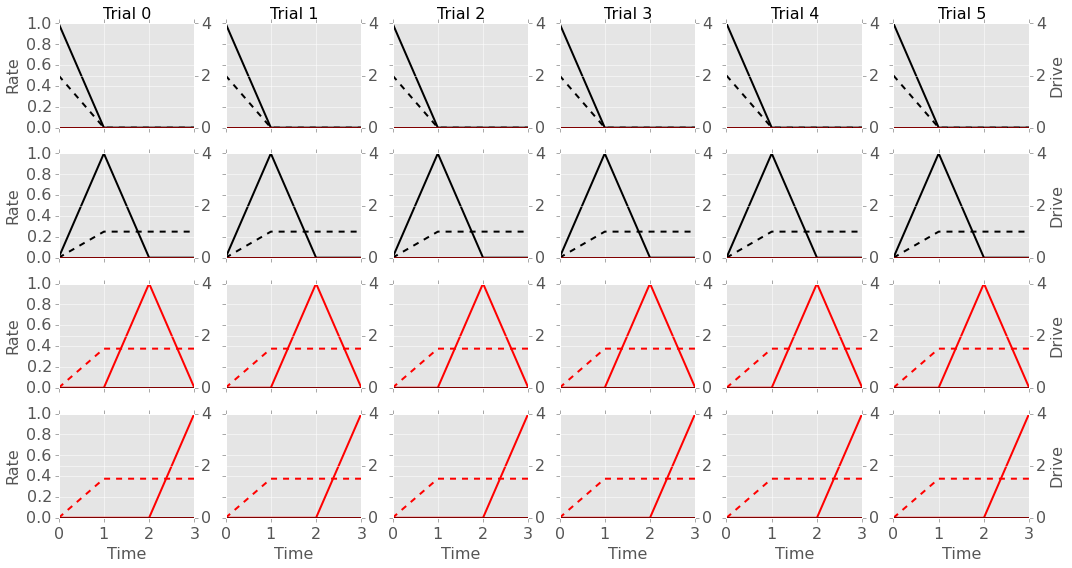

In [3]:
softmax_chains_planning_and_learning.planning(CONFIG_PLANNING)

As expected, we see that even though the input (dashed line) is purely spatial the temporal sequence (black-0, black-1, red-2, red-3) is played reliably.

### One-shot learning of new sequences
The ability of this network to replay novel sequences suggests that such a feature could be used to learn to new sequences that have been presented only once. I explore how this might occur by adding to the model a simplified version of spike-timing-dependent plasticity (STDP). The hypothesis is that a weak connection could get significantly strengthened if the nodes it connected repeatedly activated in sequence. To implement this I add the following STDP rule: if two nodes are connected, then if they are sequentially activated their connection strength $w$ increases by

$$\Delta w = \alpha(w_{max} - w)$$.

Additionally, since I now depart from immediate replay and examine much longer post-stimulus timescales, I add a timescale $\tau_{hde}$ to the history-dependent excitability, after which the history-dependent excitability gets set to zero.

In [44]:
CONFIG_LEARNING = {
    'SEED': None,
    
    'N_CHAINS': 9,
    'CHAIN_LENGTH': 4,
    
    'W_STRONG': 2,
    'W_WEAK': 1,
    'WEAK_CXN_IDXS': (2, 1),
    
    'GAIN': 3.5,
    'HDE_INPUT_VALUE': 1.5,
    'HDE_TIMESCALE': 20,
    
    'ALPHA': .1,
    'W_MAX': 2,
    
    'DRIVE_BY_COORDINATE': [
            [((0, chain_pos), 3) if chain_pos < 2 else ((1, chain_pos), 3) for chain_pos in range(4)] + 
            80* [((0, 0), 0)] +
            10 * [((0, 0), 3), ((0, 0), 0), ((0, 0), 0), ((0, 0), 0)]
            for _ in range(8)
        ],

    'N_TRIALS': 8,
    'WS_TO_TRACK': [
            [(1, 2), (0, 1)]
        ],
    
    'FIG_SIZE': (15, 8),
    'COLORS': [
            (0, 0, 0),(1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 1, 1),
            (1, 0, 1), (.5, .5, 0), (.5, .5, .5), (.5, 0, 0)
        ],
    'LW': 2,
    'FONT_SIZE': 16,
}

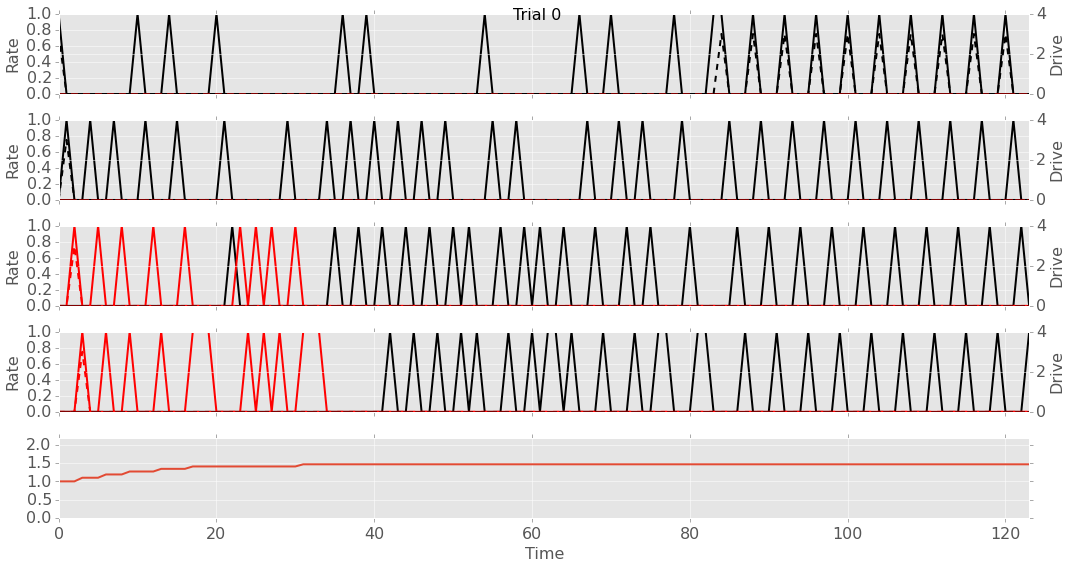

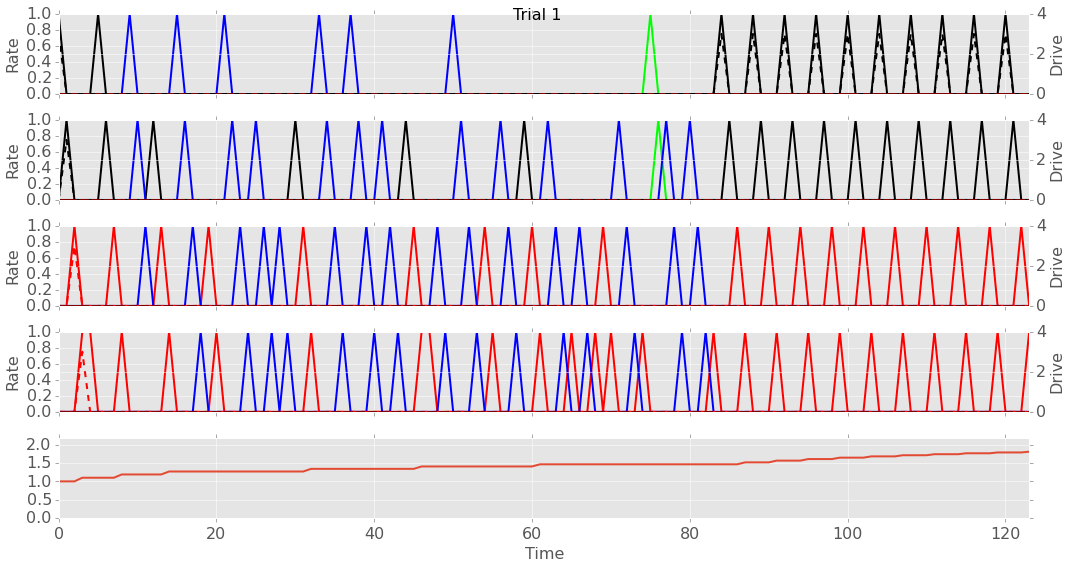

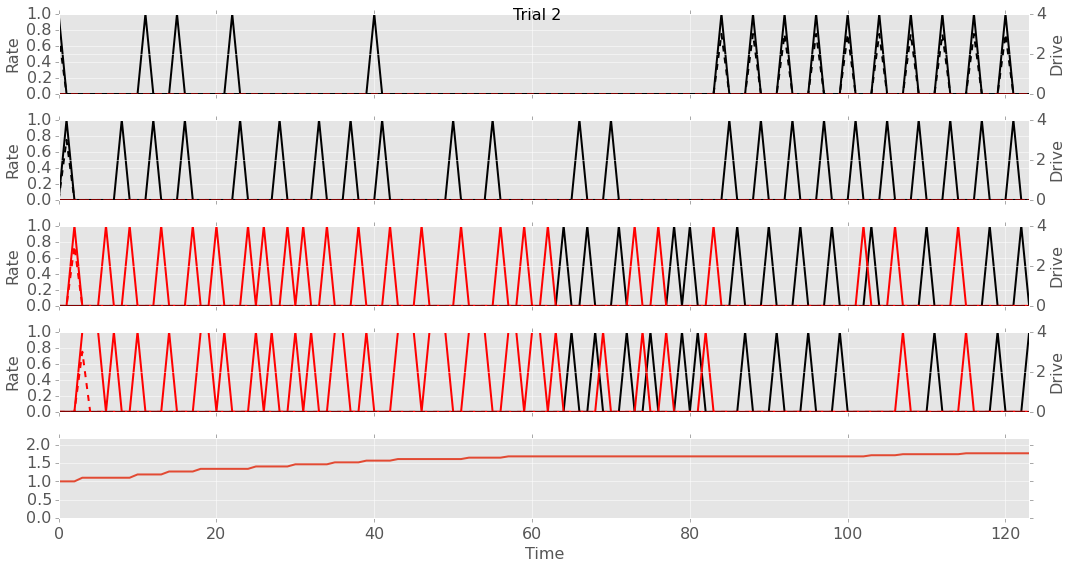

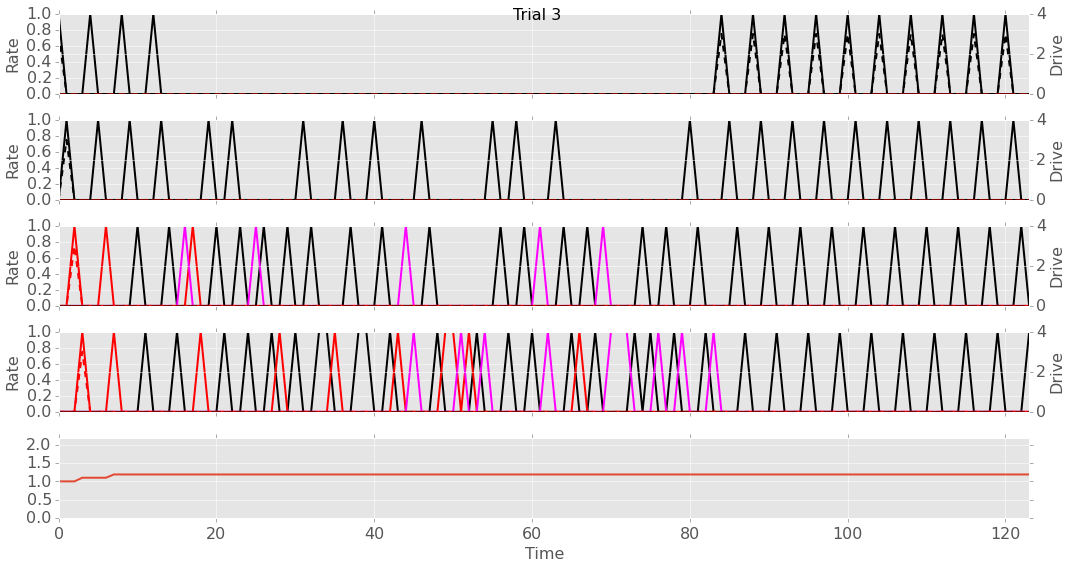

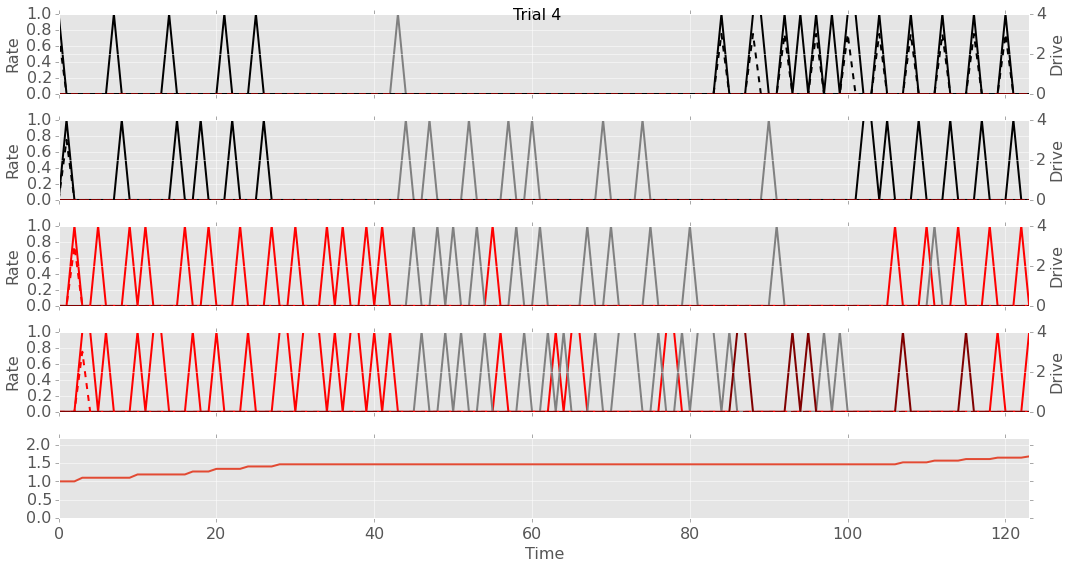

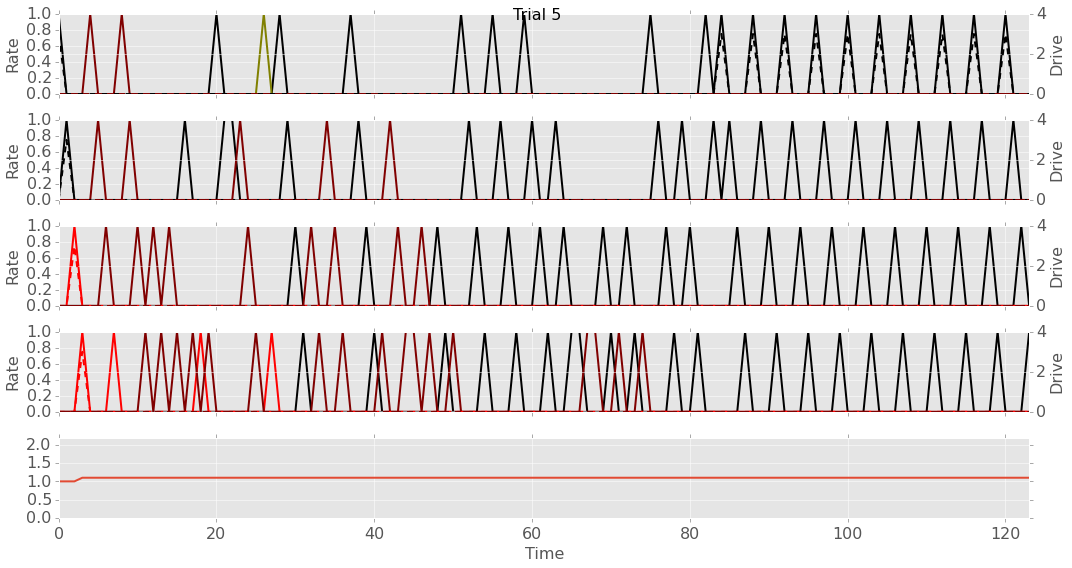

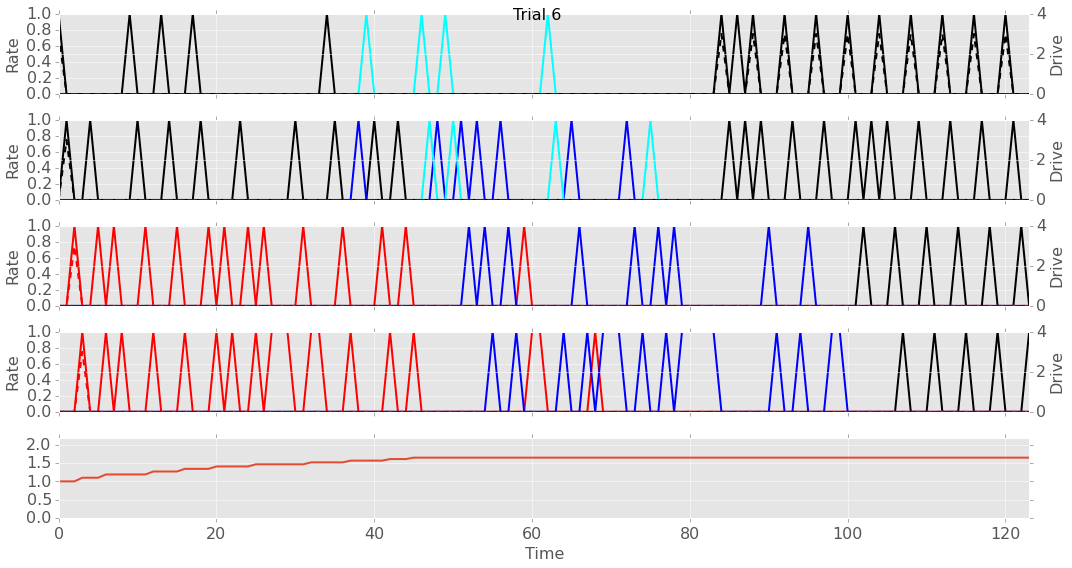

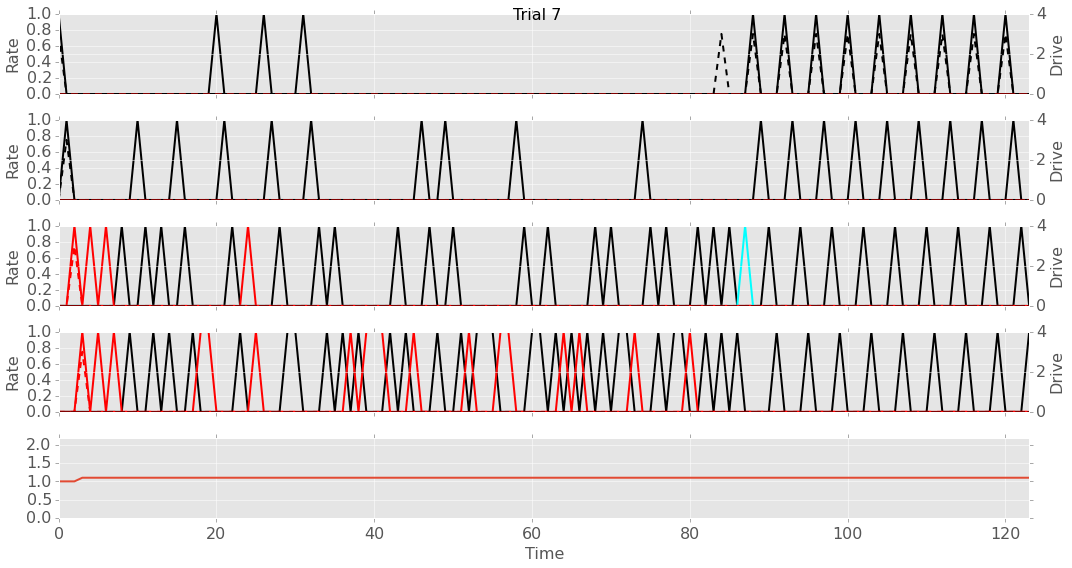

In [45]:
softmax_chains_planning_and_learning.learning(CONFIG_LEARNING)